# [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)   


### Goal   
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

### Metric
Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

### Submission File Format
You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)
PassengerId,Survived
 892,0
 893,1
 894,0
 Etc.
You can download an example submission file (gender_submission.csv) on the [Data page](https://www.kaggle.com/c/titanic/data).   

**Variable Notes**    
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5   

sibsp: The dataset defines family relations in this way...   
Sibling = brother, sister, stepbrother, stepsister   
Spouse = husband, wife (mistresses and fiancés were ignored)   

parch: The dataset defines family relations in this way...   
Parent = mother, father   
Child = daughter, son, stepdaughter, stepson   
Some children travelled only with a nanny, therefore parch=0 for them.

### ___Memos for M.Xue___
This is an excersice in **Chapter2** of ["Hands-On Machine Learning with Scikit-Learn and TensorFlow",A. Geron](https://item.jd.com/12241590.html)

- Getting a first feeling and touch of building a Machine Learning system.
- Working with the book's stream step by step.
- Picking up the skills of using pipelines on the data transformations.
- ...

### Main steps
 1. Frame the problem and look at the big picture.
 2. Get the data.
 3. Discover and visualize the data to gain insights.
 4. Prepare the data for Machine Learning algorithms.
 5. Select a model and train it.
 6. Fine-tune your model.
 7. Present your solution.
 8. Launch, monitor, and maintain your system.

In [1]:
# import libraries
%matplotlib inline
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/ming/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
def whichFeatures(df):
    count = 0
    print('The Features are: ')
    for feature in df.columns:
        count = count + 1
        print('%d. '%(count), feature)

In [3]:
# just for test
def split_train_test(data_set,test_ratio=0.2):
    """
    split the dataset into train_set and test_set by the test_ratio
    """
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data_set))
    test_set_size = int(test_ratio*len(data_set))
    test_indices,train_indices = shuffled_indices[:test_set_size],shuffled_indices[test_set_size:]
    
    return data_set.iloc[train_indices],data_set.iloc[test_indices]

In [3]:
data_set = pd.read_csv('train.csv')

In [5]:
from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(data_set, test_size=0.2, random_state=42)

#print(len(train_set)," train + ", len(test_set), "test")

# know what features are in the data:
whichFeatures(data_set)

The Features are: 
1.  PassengerId
2.  Survived
3.  Pclass
4.  Name
5.  Sex
6.  Age
7.  SibSp
8.  Parch
9.  Ticket
10.  Fare
11.  Cabin
12.  Embarked


In [6]:
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### __Frame the problem and look at the Big Picture__ 
- This a __binary classification__ problem.
- If one _randomly_ guess 0 or 1 of the survival for the passengers, he could be still get an accurracy of 50%.   
- 考虑到年龄和性别对生存概率的影响极大，应该按照年龄和性别对数据集进行StratifiedShuffleSplit().   
- 

In [7]:
def showValue_Counts(dataF,cols):
    for col in cols:
        if dataF.columns.contains(col):
            print('-----------')
            print(dataF[col].value_counts())
            print('-----------')

In [8]:
cols = ['Survived','Pclass', 'Sex','SibSp','Parch','Cabin','Embarked']
showValue_Counts(data_set,cols)

-----------
0    549
1    342
Name: Survived, dtype: int64
-----------
-----------
3    491
1    216
2    184
Name: Pclass, dtype: int64
-----------
-----------
male      577
female    314
Name: Sex, dtype: int64
-----------
-----------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
-----------
-----------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
-----------
-----------
B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F2                 3
D                  3
E101               3
F33                3
D20                2
B77                2
B49                2
C124               2
B58 B60            2
E121               2
B57 B59 B63 B66    2
E33                2
B28                2
B5                 2
C125               2
C78                2
E8                 2
C93                2
D17                2
B20                2
E44                2
C92         

In [9]:
corr_matrix = data_set.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [10]:
data_set.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### 预处理数据：清洗、重组、提取有用信息

### 下面要做的事情：   
1. drop不想要的feature.   
2. Handling text feature.   
3. fill the NAN with certain values
4. "Fare" 进行一些scale

> 先对整个数据集的拷贝做以下操作之后，再去分解为训练集和测试集：   
  - （male， female）-> (1,0) : 用gender值代替Sex, 删除Sex 
  - 'Embarked' -> one hot encoding
  - 'Name' -> Prefix, 再粗粒化一下, one-hot 编码
  - 'Cabin'值strip()后提取首字母作为客舱的标记
  - 删除'Ticket','PassengerId','Cabin' 这些没有信息量的feature
  - 考虑如何填充 NAN为合适的值
  - __全部数值化或者one-hot 编码处理为full_set__   
  
   __接下来对数据集按照age_cat分层分割为训练集和测试集，记得删除age_cat，再训练不同模型__

In [8]:
# 从Name里提取表示头衔的Prefix

# 用+表示至少一个字符, .匹配一个任意字符  \s匹配一个空格
def getPrefix(name):
    m = re.match(r'([a-zA-Z\_\-\'\s+]+)(\,\s+)([0-9a-zA-Z\_]+)(\.)(.+)', name)
    if m is not None:
        prefix = m.group(3)
    else:
        prefix='NAN'
    return prefix
# 上述正则表达式匹配效果并不完美且比较复杂，而且特殊符号要手动考虑进去

# 运用re的split 方法来做试试：
def getPrebyreSplitStrip(name):
    m = re.split(r'\,|\.',name)
    if m is not None:
        prefix = m[1].strip()
    else:
        prefix='NAN'
    return prefix

# drop the added feature "age_cat"
def drop_features(dataF,features):
    """
    features contains the list of features u want to drop!
    """
    for col in features:
        if dataF.columns.contains(col):
            dataF.drop([col],axis=1,inplace=True)
    return dataF

# name----> Prefix, drop 'Name'
def dataFrame_name2Prefix(df):
    if df.columns.contains('Name'):
        df['Prefix'] = df['Name'].map(getPrebyreSplitStrip)
        df.drop(['Name'],axis=1,inplace=True)
    return df

def newCabin(cabin):
    if cabin is not np.nan:
        newcabin = cabin[0]
    else:
        newcabin = 'X'
    return newcabin

In [29]:
def prepDataSet(dataSet):
    from sklearn.preprocessing import Imputer
    from sklearn.preprocessing import LabelEncoder
    from sklearn import preprocessing
    
    # add prefix
    data_set_pre = dataFrame_name2Prefix(dataSet)
    # gender <- sex,  newCabin <- Cabin
    data_set_pre['Gender'] = 1*(data_set_pre['Sex']=='male')
    data_set_pre['newCabin'] = data_set_pre['Cabin'].apply(newCabin)
    
    data_set_pre['Relatives'] = data_set_pre['Parch']+data_set_pre['SibSp']
    
    # fill nan of Age
    age_median = data_set_pre['Age'].median()
    data_set_pre['Age'].fillna(age_median,inplace=True)
    # fill nan of Embarked
    data_set_pre['Embarked'].fillna('U',inplace=True)# unkown
    
    # on-hot encoding 
    encoder = LabelEncoder()
    data_Embarked_encoded = encoder.fit_transform(data_set_pre["Embarked"])
    data_set_pre["num_Embarked"] = pd.Series(data_Embarked_encoded)
    
    data_prefix_encoded = encoder.fit_transform(data_set_pre["Prefix"])
    data_set_pre["num_prefix"] = pd.Series(data_prefix_encoded)
    
    data_newCabin_encoded = encoder.fit_transform(data_set_pre["newCabin"])
    data_set_pre["num_newCabin"] = pd.Series(data_newCabin_encoded)
    # feature scaling
    data_set_pre["Fare"] = data_set_pre["Fare"]*0.1
    # drop useless features
    drop_features(data_set_pre,['Sex','Ticket','PassengerId','Cabin',"Embarked",'Prefix','newCabin']);
    return data_set_pre

In [30]:
data_set_prep = prepDataSet(data_set.copy())

In [31]:
data_set_prep.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Relatives,num_Embarked,num_prefix,num_newCabin
0,0,3,22.0,1,0,0.72500,1,1,2,11,8
1,1,1,38.0,1,0,7.12833,0,1,0,12,2
2,1,3,26.0,0,0,0.79250,0,0,2,8,8
3,1,1,35.0,1,0,5.31000,0,1,2,12,2
4,0,3,35.0,0,0,0.80500,1,0,2,11,8
5,0,3,28.0,0,0,0.84583,1,0,1,11,8
6,0,1,54.0,0,0,5.18625,1,0,2,11,4
7,0,3,2.0,3,1,2.10750,1,4,2,7,8
8,1,3,27.0,0,2,1.11333,0,2,2,12,8
9,1,2,14.0,1,0,3.00708,0,1,0,12,8


In [12]:
data_set_prep.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Relatives,num_Embarked,num_prefix,num_newCabin
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.016639,-0.163517,-0.193635,-0.301116
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.065997,0.157112,0.029099,0.746616
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.245619,-0.014205,0.284653,-0.255783
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,0.890712,0.066654,-0.200046,0.041540
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,0.783111,0.038322,-0.126422,-0.032548
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,0.217138,-0.221226,-0.077461,-0.523013
Gender,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.200988,0.104057,0.250075,0.123076
Relatives,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,-0.200988,1.000000,0.064701,-0.199883,0.012131
num_Embarked,-0.163517,0.157112,-0.014205,0.066654,0.038322,-0.221226,0.104057,0.064701,1.000000,0.071998,0.187015
num_prefix,-0.193635,0.029099,0.284653,-0.200046,-0.126422,-0.077461,0.250075,-0.199883,0.071998,1.000000,0.043907


In [13]:
showValue_Counts(data_set_with_pre, ['Cabin'])

NameError: name 'data_set_with_pre' is not defined

### 分割数据集为训练集和测试集：stratified split

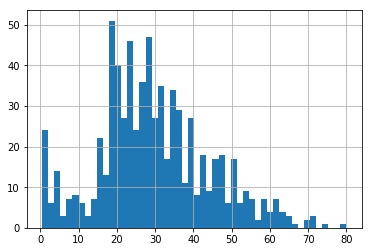

In [14]:
# Knowing the fact that women and chidren go first !
# The very importance of features "Age" and "Sex", 
# the test set from the whole data set should be representative of the whole set.
data_set["Age"].hist(bins=50)

In [ ]:
data_set["Sex"].value_counts()/len(data_set)

#### Adding age_class to the dataset

In [ ]:
#### Adding age_cat to the dataset
# (0-18 19-39 40-59 >60)
def ageClss(age):
    whois = ''
    if age <= 18:
        whois = 'Child'
    elif age <= 39:
        whois = 'Teenager'
    elif age <= 59:
        whois = 'MiddleAge'
    elif age == 'NaN':
        whois = 'NaN'
    else:
        whois = 'elder'
    return whois
        
data_set['age_cat'] = data_set['Age'].map(ageClss)

In [ ]:
data_set.head()

In [ ]:
# 不需要执行此段
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data_set,data_set['age_cat']):
    strat_train_set = data_set.loc[train_index]
    strat_test_set = data_set.loc[test_index]

> __这里有个问题： 如何实习两个feature的stratified 数据集分割？ 比如这里能否同时兼顾年龄和性别的概率分布？__

我的做法：
 0. 先把性别特征数值化为0,1    
 1. 先把数据集分成男女两部分，再每部分按照feature:age_cat 分层抽样
 2. 再合并抽出来的 训练集=男训练集+女训练集 测试集=男训练集+女测试集
 3. 要测试只用年龄段和用性别加年龄段做分层抽样的对比效果！

In [ ]:
# split the full data set into male and female
male_data_set = data_set[data_set["Sex"]=='male']
female_data_set = data_set[data_set["Sex"]=='female']

# split the male set and female set according the stratified feature 
from sklearn.model_selection import StratifiedShuffleSplit

def stratify_split(dataSet,col):
    
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
    
    for train_index, test_index in split.split(dataSet,dataSet[col]):
        strat_train_set = data_set.loc[train_index]
        strat_test_set = data_set.loc[test_index]
    return strat_train_set, strat_test_set


# -------------------------------------------------------
# stratify the male and female set by the age_cat respectively.
strat_male_train_set, strat_male_test_set  = stratify_split(male_data_set,col='age_cat')
strat_female_train_set, strat_female_test_set  = stratify_split(female_data_set,col='age_cat')

# join the train , test
strat_train_set = strat_male_train_set.append(strat_female_train_set)
strat_test_set = strat_male_test_set.append(strat_female_test_set)

# Till now, we finish the stratified spliting of the full data set first by the gender and then by age_cat

#### ======================  Check the stratified split results   ==================

In [ ]:
strat_train_set.describe()

In [ ]:
strat_test_set.describe()

In [ ]:
data_set['Sex'].value_counts()/len(data_set)

In [ ]:
strat_train_set['Sex'].value_counts()/len(strat_train_set)

In [ ]:
strat_test_set['Sex'].value_counts()/len(strat_test_set)

In [ ]:
data_set['age_cat'].value_counts()/len(data_set)

In [ ]:
# The stratified counts of the age_cat when gender == male
data_set[data_set['Sex']=='male']['age_cat'].value_counts()/len(data_set[data_set['Sex']=='male']['age_cat'])

In [ ]:
# The stratified counts of the age_cat when gender == FEmale
data_set[data_set['Sex']=='female']['age_cat'].value_counts()/len(data_set[data_set['Sex']=='female']['age_cat'])

In [ ]:
strat_test_set[strat_test_set['Sex']=='male']['age_cat'].value_counts()/len(strat_test_set[strat_test_set['Sex']=='male']['age_cat'])

In [ ]:
strat_train_set[strat_train_set['Sex']=='male']['age_cat'].value_counts()/len(strat_train_set[strat_train_set['Sex']=='male']['age_cat'])

#### ============================================================

 对于Age和age_cat这两个feature，这里有两种做法： __（暂时先用第二种）__   
 
   1. 就是可以把Age这个feature删除，直接用 age_cat 来代替，做后续的训练模型用
   2. 只用age_cat 做分割数据集的参考，还是用Age特征来训练模型
   3. 都保留，但是这样这两个特征关联度会很高！age_cat 是Age的一个粗粒化表示。
 

In [ ]:
# 按年龄、性别比例分好的数据
trainSet_with_label = strat_train_set.iloc[:,:].copy()
testSet_with_label = strat_test_set.iloc[:,:].copy()

Ytrain = trainSet_with_label['Survived']
Xtrain = drop_features(trainSet_with_label,['PassengerId','Survived','Cabin','Ticket','age_cat'])

Ytest = testSet_with_label['Survived']
Xtest = drop_features(testSet_with_label,['PassengerId','Survived','Cabin','Ticket','age_cat'])

In [ ]:
Xtrain.head()

In [ ]:
Xtest.tail()

__头衔匹配有个问题：__   
    就是有点头衔出现次数比较少，可能训练集里没有，分割出来的测试集里才有，比如 Dr., Don, Rev,Mlle,Mme.... 这些奇怪的头衔
    - Don:  大学教师，（牛津、剑桥大学的）导师，特别研究员;
    - Mme: Mademoiselle的缩写 指小姐;


In [ ]:
Xtrain0, Xtest0 = dataFrame_name2Prefix(Xtrain), dataFrame_name2Prefix(Xtest)

In [ ]:
Xtrain0['Prefix'].value_counts()

In [ ]:
Xtest0['Prefix'].value_counts()

### 关于 feature 特征的观察  
- __Cabin客舱信息内容缺失多，似乎没看到什么关联信息__    
- __Ticket 也一下子看不出什么信息__
- __PassengerId没有信息量__
- 要把prefix 分成少一点的几类，现在的直接提取prefix分类过多

In [ ]:
trainSet.head(6)

### 下面的任务是需要将字符的转成数值的feature，显示关联度，并尝试训练（2018.08.08）

### Main program

In [15]:
# import libraries
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Gain insights from the data

#### Summaries of the Pearson's coeffiecient r:   
- ID is irrevalant as in first thinking !

- r(Survive,Pclass)=-0.338,r(Survive,Fare)=0.257, r(Pclass,Fare)=-0.55,r(Pclass,Age)=-0.37:   
  People with higher socio-economic status (SES) survive more.     
- Pclass and the Fare can be merge to one feature in a very crude(r=-0.55 not very close to -1) approximation.

- people who with more siblings on board tend to have parents or childeren on the board (r=0.41438).   
  maybe we can merge these two by adding them to be "relatives".   
- (Pclass,Age) r = -0.369226; (Fare,Pclass) r = -0.55

- (Age,sibling) r = -0.30825 : reasonable!   
- 

### Preparing the training data...

- Transform the gender (female,male) $\rightarrow$ (0,1). Gender should be a important featur in deciding the survival probability.   
- Merge features "Relatives"="SibSp"+"Parch".
- Drop "Cabin", "Name" and "Ticket" in the training features, because they are irrevelant.   
- Embarked->[0,1,2,3..] or using one-hot encoding ?
- y_train = data["Survived"]

In [ ]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from pandas.tools.plotting import scatter_matrix

data_input = pd.read_csv('train.csv')
data_work = data_input.copy()
y_traing_labels = data_work["Survived"]
# ---------------------------------------------------------
# Try to transform all the feature value to numeric values.
# ----------------------------------------------------------
def prepareData(data_work):
# engeering new feature: "Relatives"
    data_work["Relatives"] = data_work["SibSp"]+data_work["Parch"]

# (female,male)->(0,1)
    encoder = LabelEncoder()
    data_sex_encoded = encoder.fit_transform(data_work["Sex"])
    data_work["Gender"] = pd.Series(data_sex_encoded)

#data_work["Embarked"].fillna("X")
    data_Embarked_encoded = encoder.fit_transform(data_work["Embarked"].fillna('X'))
    data_work["num_Embarked"] = pd.Series(data_Embarked_encoded)
    
# drop irrevalent features
    drop_attributes = ["Name","Ticket","Cabin","SibSp","Parch","Sex","Embarked"]
    data_work.drop(drop_attributes,axis=1,inplace=True)

# if age=na, fill it with the median of age. 
    age_median = data_work["Age"].median()
    data_work["Age"].fillna(age_median,inplace=True)
    
    #imputer = Imputer(strategy="median")
    #imputer.fit(data_work)
    return data_work

In [ ]:
# New_attributes = list(data_work.columns)
attributes = ['Pclass','Age', 'Fare','Relatives', 'Gender', 'num_Embarked']
scatter_matrix(data_work[attributes],figsize=(18,18))

In [ ]:
data_work.corr()

In [36]:
from sklearn.linear_model import LinearRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

data_work_pre=  data_set_prep.copy()#prepareData(data_work)
y_traing_labels = data_work_pre['Survived']
data_work_pre.drop("Survived",axis=1,inplace=True)
#lin_reg = LinearRegression()
#lin_reg.fit(data_work,y_traing_labels)

tree_clf=DecisionTreeClassifier()
tree_clf.fit(data_work_pre,y_traing_labels)

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(data_work_pre,y_traing_labels)

rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(data_work_pre,y_traing_labels)

/home/ming/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
data_test = pd.read_csv('test.csv')
data_test_pre = prepDataSet(data_test.copy())
#data_set_prep = prepDataSet(data_set.copy())
y_test = pd.Series(rnd_clf.predict(data_test_pre.fillna(28.0)))

In [38]:
result = pd.DataFrame({"PassengerId":data_test["PassengerId"].values, 'Survived':y_test})

In [39]:
result.to_csv("result4_rnd.csv",index=0)

In [ ]:
y_traing_labels